## Respiratory disease analysis MA
* Respiratory disease data MA analysis to understand disease burden
* Date: 27 June 24
* Mala Chaurasia


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Three sets of data for the project
* Wastewater time series analysis
* Flu time series analysis
* Analysing correlation of respiratory viarl diseaes: covid &  wastewater, covid & influeza with vaccine

## Scope of this analysis
**Viral disease data
 exploratory analysis, understanding correlations and vaccination impact.**

**Respiratory historical data**

In [2]:
tabs = pd.ExcelFile("/content/respiratory-disease-data-reporting-05-23-24.xlsx").sheet_names
print(tabs)

['Introduction', 'Visits by week', 'Data by Patient Demographics', 'Visits by Hospital County', 'Previous Seasons by Week', 'Historic demographic data', 'Data Dictionary', 'Definitions', 'Resources']


## Viral respiratory diseases current data

In [3]:
tabs = pd.ExcelFile("/content/viral-respiratory-page-data-05-23-24.xlsx").sheet_names
print(tabs)

['Introduction', 'COVID and Flu Levels', 'Respiratory Disease Reporting', 'Wastewater Reporting', 'COVID-19 Reporting', 'Vaccination data', 'Immunizations', 'Influenza Reporting', 'Severity Level Definitions', 'Data Dictionary']


In [4]:
covid_flu_levels=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx", 'COVID and Flu Levels')

In [5]:
respiratory_report=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx", 'Respiratory Disease Reporting')

In [6]:
wastewater_report=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx", 'Wastewater Reporting')

In [7]:
covid_report=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx", 'COVID-19 Reporting')

In [8]:
vaccination=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx", 'Vaccination data')

In [9]:
immunization=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx",  'Immunizations')

In [10]:
influenza_report=pd.read_excel("/content/viral-respiratory-page-data-05-23-24.xlsx",  'Influenza Reporting')

# Descriptive analysis of each dataset



# Viral respiratory disease current data with following information

## 7 sheets within

* Covid Flu levels -current
* Current respiratory disease and ED visits + hospitalization
* Current wastewater Sars Cov2 concenrtation levels
* Covind 19 reportig
* Vaccinatio data
* Immunizartions data
* Influenza data

## Scope: Only Covid data will be consolidated and prediction models will be created.

In [11]:
covid_flu_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Season                                                      138 non-null    object        
 1   Week Start Date                                             138 non-null    datetime64[ns]
 2   Week End Date                                               138 non-null    datetime64[ns]
 3   Severity level type                                         138 non-null    object        
 4   Percent of all visits for broad acute respiratory syndrome  92 non-null     float64       
 5   Severity Level                                              138 non-null    object        
 6   Last updated                                                138 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float

In [12]:
covid_flu_levels.describe(include=['object'])

,Season,Severity level type,Severity Level
count,138,138,138
unique,1,3,6
top,2023-2024,COVID-19 ED visits,Low
freq,138,46,86


In [13]:
covid_flu_levels.describe()

,Week Start Date,Week End Date,Percent of all visits for broad acute respiratory syndrome,Last updated
count,138,138,92.000000,138
mean,2023-12-06 12:00:00,2023-12-12 12:00:00,0.158533,2024-05-23 00:00:00
min,2023-07-02 00:00:00,2023-07-08 00:00:00,0.080000,2024-05-23 00:00:00
25%,2023-09-17 00:00:00,2023-09-23 00:00:00,0.130000,2024-05-23 00:00:00
50%,2023-12-06 12:00:00,2023-12-12 12:00:00,0.158500,2024-05-23 00:00:00
75%,2024-02-25 00:00:00,2024-03-02 00:00:00,0.187000,2024-05-23 00:00:00
max,2024-05-12 00:00:00,2024-05-18 00:00:00,0.286000,2024-05-23 00:00:00
std,NaN,NaN,0.045219,NaN


In [14]:
covid_flu_levels.head()

,Season,Week Start Date,Week End Date,Severity level type,Percent of all visits for broad acute respiratory syndrome,Severity Level,Last updated
0,2023-2024,2023-07-02,2023-07-08,COVID-19 ED visits,0.082,Minimal,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,COVID-19 ED visits,0.164,Low,2024-05-23
2,2023-2024,2023-08-20,2023-08-26,COVID-19 ED visits,0.094,Low,2024-05-23
3,2023-2024,2023-12-10,2023-12-16,COVID-19 ED visits,0.187,Moderate,2024-05-23
4,2023-2024,2023-12-17,2023-12-23,COVID-19 ED visits,0.205,Moderate,2024-05-23


In [15]:
# Begin and end dates
print("Week begin date initial:", covid_flu_levels['Week Start Date'].min(), "\nWeek begin date last:", covid_flu_levels['Week Start Date'].max())


Week begin date initial: 2023-07-02 00:00:00 
Week begin date last: 2024-05-12 00:00:00


In [16]:
# Begin and end dates
print("Week end date initial:", covid_flu_levels['Week End Date'].min(), "\nWeek end date last:", covid_flu_levels['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [17]:
covid_flu_levels['Severity level type'].value_counts()

,count
Severity level type,
COVID-19 ED visits,46
COVID-19 Hospital Admissions,46
Influenza,46


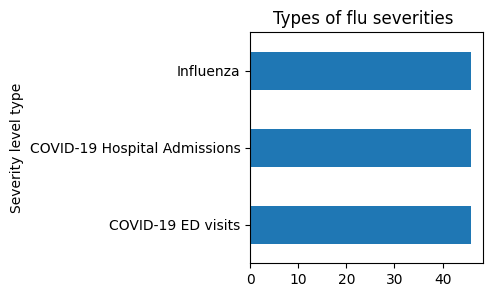

In [18]:
plt.figure(figsize=(3,3))
covid_flu_levels['Severity level type'].value_counts().plot(kind='barh')
plt.title("Types of flu severities ");

In [19]:
covid_flu_levels['Severity Level'].value_counts()

,count
Severity Level,
Low,86
Minimal,22
Moderate,18
High,6
Medium,5
Substantial,1


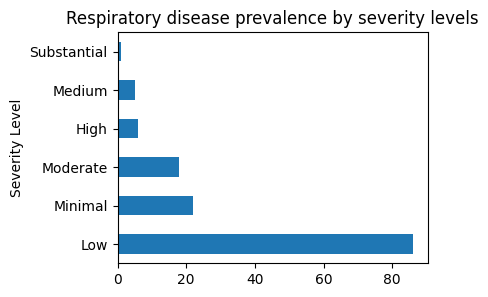

In [20]:
plt.figure(figsize=(4,3))
covid_flu_levels['Severity Level'].value_counts().plot(kind='barh')
plt.title("Respiratory disease prevalence by severity levels");

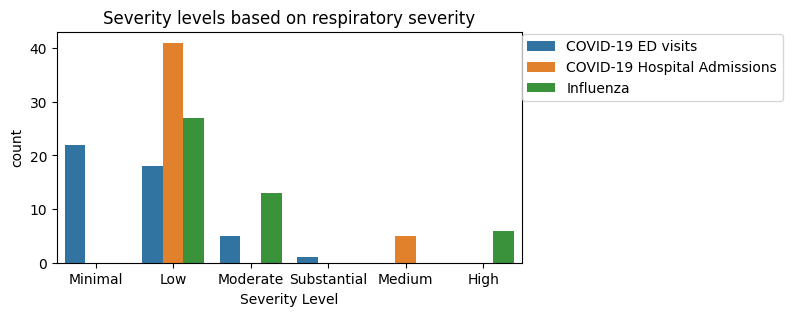

In [21]:
plt.figure(figsize=(6,3))
sns.countplot(covid_flu_levels, x='Severity Level', hue='Severity level type').set(title='Severity levels based on respiratory severity');
# Put the legend out of the figure
plt.legend( bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

In [22]:
covid_flu_levels.isna().any()

,0
Season,False
Week Start Date,False
Week End Date,False
Severity level type,False
Percent of all visits for broad acute respiratory syndrome,True
Severity Level,False
Last updated,False


In [23]:
covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']['Percent of all visits for broad acute respiratory syndrome']

,Percent of all visits for broad acute respiratory syndrome
0,0.082
1,0.164
2,0.094
3,0.187
4,0.205
5,0.101
6,0.135
7,0.211
8,0.099
9,0.131


In [24]:

covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']['Percent of all visits for broad acute respiratory syndrome']

,Percent of all visits for broad acute respiratory syndrome
46,0.130
47,0.202
48,0.150
49,0.234
50,0.247
51,0.158
52,0.182
53,0.273
54,0.136
55,0.177


In [25]:
covid_flu_levels[covid_flu_levels['Severity level type']=='Influenza']['Percent of all visits for broad acute respiratory syndrome']

,Percent of all visits for broad acute respiratory syndrome
92,NaN
93,NaN
94,NaN
95,NaN
96,NaN
97,NaN
98,NaN
99,NaN
100,NaN
101,NaN


## Influenza % visits were not tracked. Keeping data as is for later analysis. Since covid will form a separate set.

In [26]:
### Imputing all Influenza severity level missing value with moderate
### covid_flu_levels['Percent of all visits for broad acute respiratory syndrome']=covid_flu_levels['Percent of all visits for broad acute respiratory syndrome'].fillna(0.01)

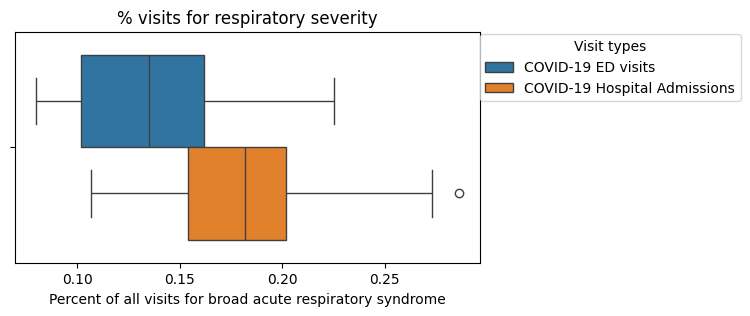

In [27]:
# Box plot for percent of all visits for acute respiratory syndrome. Filtering out influenza
df=covid_flu_levels[ (covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions') | (covid_flu_levels['Severity level type']=='COVID-19 ED visits')]
plt.figure(figsize=(6,3))
sns.boxplot(df, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity level type').set(title="% visits for respiratory severity")
# Put the legend out of the figure
plt.legend(title='Visit types',  bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);


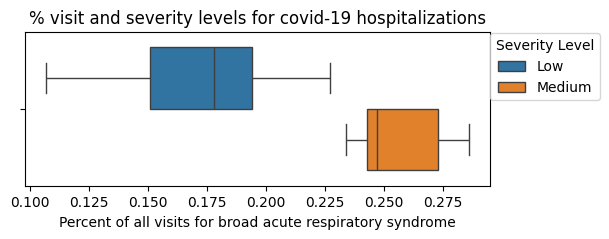

In [28]:
# Box plot for percent of all visits for acute respiratory syndrome.Filtered out influenza as all values are null
df1=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']
plt.figure(figsize=(6,2))
sns.boxplot(df1, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity Level').set(title="% visit and severity levels for covid-19 hospitalizations")
# Put the legend out of the figure
plt.legend( title='Severity Level', bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

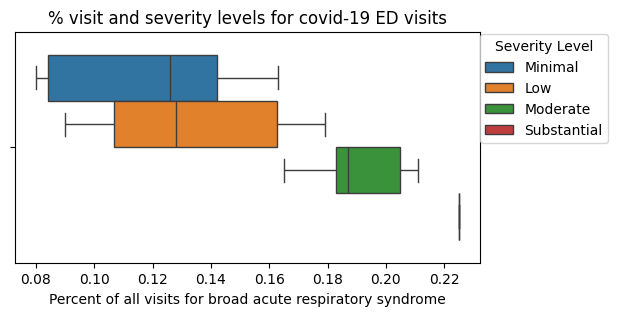

In [29]:
# Box plot for percent of all visits for acute respiratory syndrome.Filtered out influenza as all values are null
df1=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']
plt.figure(figsize=(6,3))
sns.boxplot(df1, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity Level').set(title="% visit and severity levels for covid-19 ED visits");
# Put the legend out of the figure
plt.legend(  title='Severity Level', bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

## Respiratory report


In [30]:
respiratory_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Season                                               92 non-null     object        
 1   Week Start Date                                      92 non-null     datetime64[ns]
 2   Week End Date                                        92 non-null     datetime64[ns]
 3   Visit type                                           92 non-null     object        
 4   Percent of all visits for acute respiratory disease  92 non-null     float64       
 5   Percent of all visits for COVID-19                   92 non-null     float64       
 6   Percent of all visits for RSV                        92 non-null     float64       
 7   Percent of all visits for influenza                  92 non-null     float64       
 8   Las

In [31]:
respiratory_report.describe()

,Week Start Date,Week End Date,Percent of all visits for acute respiratory disease,Percent of all visits for COVID-19,Percent of all visits for RSV,Percent of all visits for influenza,Last updated
count,92,92,92.000000,92.000000,92.000000,92.000000,92
mean,2023-12-06 12:00:00,2023-12-12 12:00:00,0.158533,0.021348,0.004359,0.011261,2024-05-23 00:00:00
min,2023-07-02 00:00:00,2023-07-08 00:00:00,0.080000,0.004000,0.000000,0.000000,2024-05-23 00:00:00
25%,2023-09-17 00:00:00,2023-09-23 00:00:00,0.130000,0.010000,0.000750,0.001000,2024-05-23 00:00:00
50%,2023-12-06 12:00:00,2023-12-12 12:00:00,0.158500,0.019000,0.002000,0.005000,2024-05-23 00:00:00
75%,2024-02-25 00:00:00,2024-03-02 00:00:00,0.187000,0.029250,0.006250,0.021000,2024-05-23 00:00:00
max,2024-05-12 00:00:00,2024-05-18 00:00:00,0.286000,0.072000,0.021000,0.043000,2024-05-23 00:00:00
std,NaN,NaN,0.045219,0.014570,0.005670,0.011838,NaN


In [32]:
respiratory_report.describe(include='object')

,Season,Visit type
count,92,92
unique,1,2
top,2023-2024,ED visits
freq,92,46


In [33]:
respiratory_report.head()

,Season,Week Start Date,Week End Date,Visit type,Percent of all visits for acute respiratory disease,Percent of all visits for COVID-19,Percent of all visits for RSV,Percent of all visits for influenza,Last updated
0,2023-2024,2023-07-02,2023-07-08,ED visits,0.082,0.005,0.000,0.001,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,ED visits,0.164,0.019,0.002,0.030,2024-05-23
2,2023-2024,2023-08-20,2023-08-26,ED visits,0.094,0.018,0.000,0.001,2024-05-23
3,2023-2024,2023-12-10,2023-12-16,ED visits,0.187,0.030,0.014,0.021,2024-05-23
4,2023-2024,2023-12-17,2023-12-23,ED visits,0.205,0.037,0.012,0.032,2024-05-23


In [34]:
# Begin and end dates
print("Week start date initial:", respiratory_report['Week Start Date'].min(), "\nWeek start date last:", respiratory_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [35]:
# Begin and end dates
print("Week end date initial:", respiratory_report['Week End Date'].min(), "\nWeek end date last:", respiratory_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [36]:
respiratory_report['Visit type'].value_counts()

,count
Visit type,
ED visits,46
Hospital admissions,46


In [37]:
respiratory_report['Week Start Date'].dt.date.sort_values() # Observation : repeat of the dates

,Week Start Date
0,2023-07-02
46,2023-07-02
17,2023-07-09
63,2023-07-09
56,2023-07-16
...,...
64,2024-04-28
8,2024-05-05
54,2024-05-05
79,2024-05-12


In [38]:
respiratory_report['Visit type'].value_counts()

,count
Visit type,
ED visits,46
Hospital admissions,46


In [39]:
ED_Visits=respiratory_report[respiratory_report['Visit type']=='ED visits']

In [40]:
Hospital_admissions=respiratory_report[respiratory_report['Visit type']=='Hospital admissions']

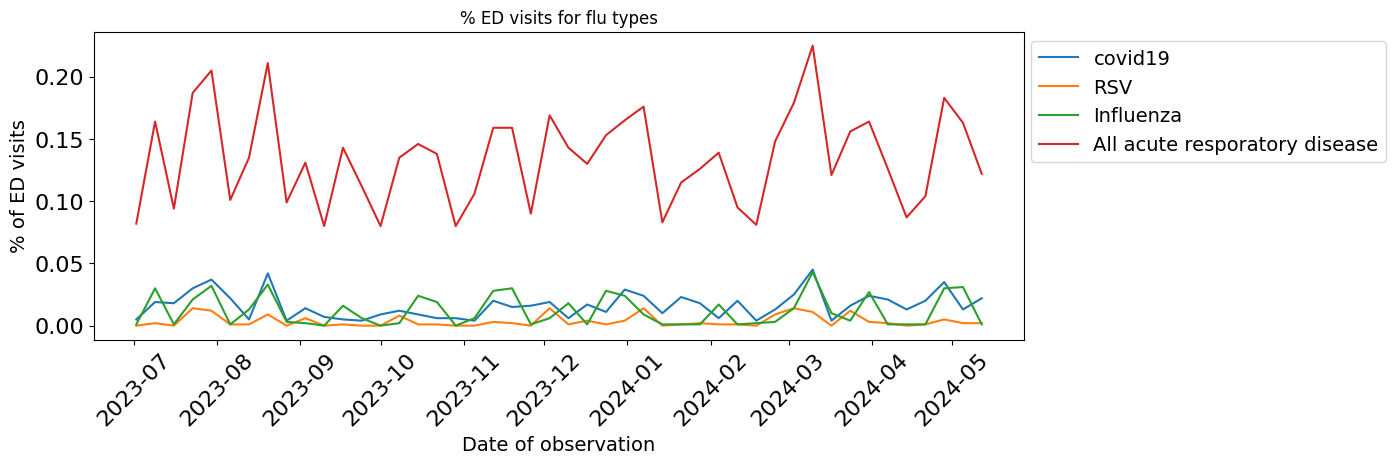

In [41]:
x = ED_Visits['Week Start Date'].dt.date.sort_values()

y1 = ED_Visits['Percent of all visits for COVID-19']
y2 = ED_Visits['Percent of all visits for RSV']
y3 = ED_Visits['Percent of all visits for influenza']
y4 = ED_Visits['Percent of all visits for acute respiratory disease']
plt.figure(figsize=(12,4))
plt.plot(x, y1,  label ='covid19')
plt.plot(x, y2,  label ='RSV')
plt.plot(x, y3,  label ='Influenza')
plt.plot(x, y4,  label ='All acute resporatory disease')
plt.xlabel("Date of observation", fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel("% of ED visits", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.),fontsize=14)
plt.title('% ED visits for flu types')
plt.show()


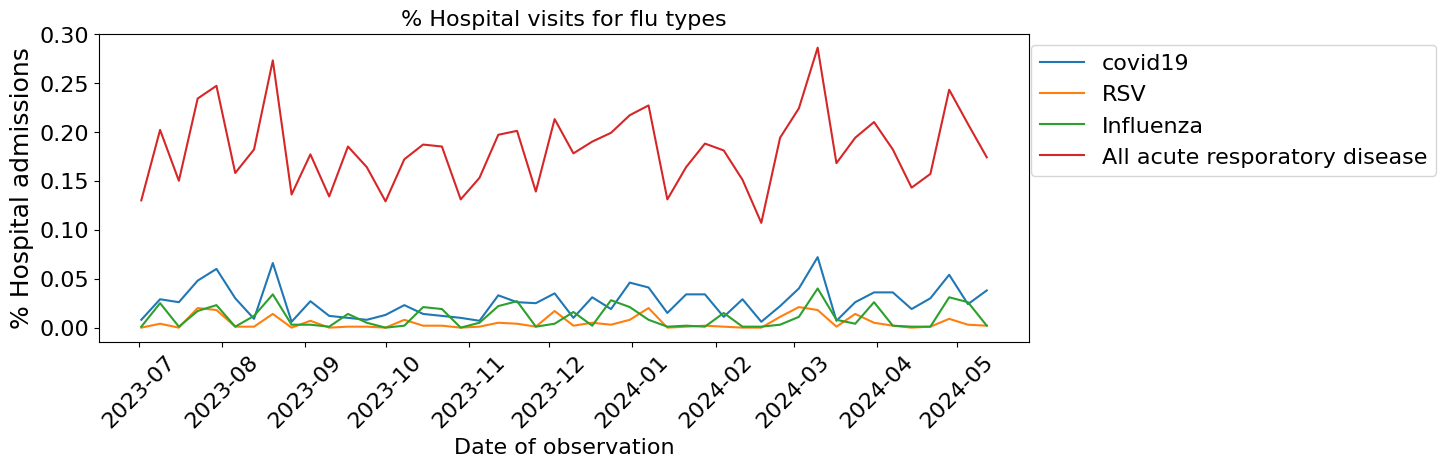

In [42]:
x = Hospital_admissions['Week Start Date'].dt.date.sort_values()


y1 = Hospital_admissions['Percent of all visits for COVID-19']
y2 = Hospital_admissions['Percent of all visits for RSV']
y3 = Hospital_admissions['Percent of all visits for influenza']
y4 = Hospital_admissions['Percent of all visits for acute respiratory disease']
plt.figure(figsize=(12,4))
plt.plot(x, y1,  label ='covid19')
plt.plot(x, y2,  label ='RSV')
plt.plot(x, y3,  label ='Influenza')
plt.plot(x, y4,  label ='All acute resporatory disease')
plt.xlabel("Date of observation",fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel("% Hospital admissions", fontsize=18)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.),fontsize=16)
plt.title('% Hospital visits for flu types', fontsize=16)
plt.show()


# Wastewater analysis

In [43]:
wastewater_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Week Start Date                                       47 non-null     datetime64[ns]
 1   Week End Date                                         47 non-null     datetime64[ns]
 2   Number of samples where SARS-CoV-2 was detected       47 non-null     int64         
 3   Last updated                                          47 non-null     datetime64[ns]
 4   Statewide average effective SARS-CoV-2 concentration  47 non-null     float64       
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 2.0 KB


In [44]:
wastewater_report.describe()

,Week Start Date,Week End Date,Number of samples where SARS-CoV-2 was detected,Last updated,Statewide average effective SARS-CoV-2 concentration
count,47,47,47.000000,47,4.700000e+01
mean,2023-12-10 00:00:00,2023-12-16 00:00:00,94.042553,2024-05-23 00:00:00,9.608283e+05
min,2023-07-02 00:00:00,2023-07-08 00:00:00,21.000000,2024-05-23 00:00:00,2.126594e+05
25%,2023-09-20 12:00:00,2023-09-26 12:00:00,93.500000,2024-05-23 00:00:00,4.660712e+05
50%,2023-12-10 00:00:00,2023-12-16 00:00:00,96.000000,2024-05-23 00:00:00,7.763483e+05
75%,2024-02-28 12:00:00,2024-03-05 12:00:00,99.000000,2024-05-23 00:00:00,1.206864e+06
max,2024-05-19 00:00:00,2024-05-25 00:00:00,119.000000,2024-05-23 00:00:00,3.427776e+06
std,NaN,NaN,12.894147,NaN,7.102229e+05


In [45]:
wastewater_report.head()

,Week Start Date,Week End Date,Number of samples where SARS-CoV-2 was detected,Last updated,Statewide average effective SARS-CoV-2 concentration
0,2023-11-12,2023-11-18,99,2024-05-23,6.144834e+05
1,2023-12-17,2023-12-23,96,2024-05-23,1.753926e+06
2,2023-10-08,2023-10-14,85,2024-05-23,6.230803e+05
3,2023-09-17,2023-09-23,98,2024-05-23,9.487317e+05
4,2024-05-12,2024-05-18,96,2024-05-23,3.652727e+05


In [46]:
# Begin and end dates
print("Week start date initial:", wastewater_report['Week Start Date'].min(), "\nWeek start date last:", wastewater_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-19 00:00:00


In [47]:
# Begin and end dates
print("Week end date initial:", wastewater_report['Week End Date'].min(), "\nWeek end date last:", wastewater_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-25 00:00:00


In [48]:
print("Min and max samples with SARS-CoV-2 infection")
wastewater_report['Number of samples where SARS-CoV-2 was detected'].min(), wastewater_report['Number of samples where SARS-CoV-2 was detected'].max()

Min and max samples with SARS-CoV-2 infection


(21, 119)

In [49]:
print("Min and max average statewide concentration of SARS-CoV-2 infection")
wastewater_report['Statewide average effective SARS-CoV-2 concentration'].min(), wastewater_report['Statewide average effective SARS-CoV-2 concentration'].max()

Min and max average statewide concentration of SARS-CoV-2 infection


(212659.40786909143, 3427776.4785423)

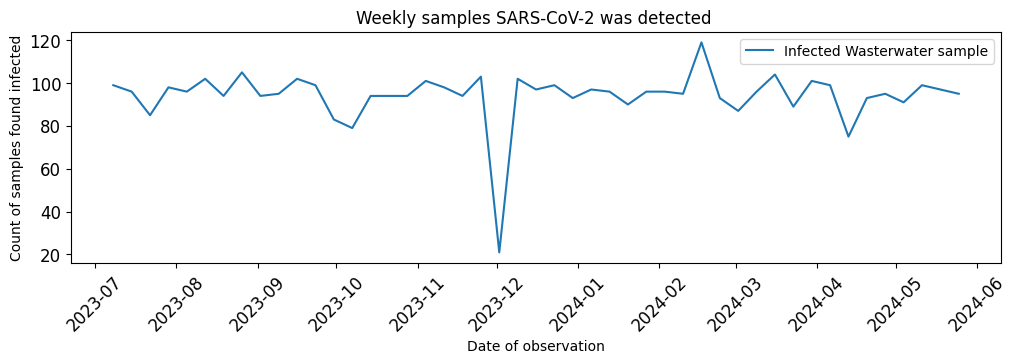

In [50]:
x = wastewater_report['Week End Date'].dt.date.sort_values()
y1 = wastewater_report['Number of samples where SARS-CoV-2 was detected']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='Infected Wasterwater sample')

plt.xlabel("Date of observation")
plt.ylabel("Count of samples found infected")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Weekly samples SARS-CoV-2 was detected ')
plt.show()

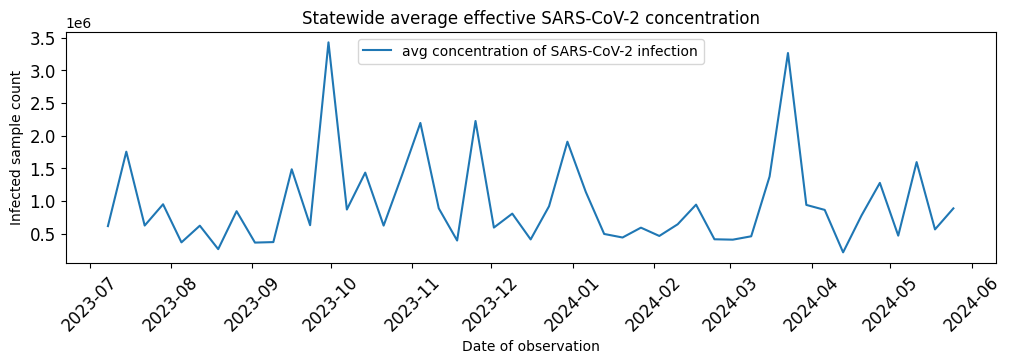

In [51]:
x = wastewater_report['Week End Date'].dt.date.sort_values()
y2 = wastewater_report['Statewide average effective SARS-CoV-2 concentration']

plt.figure(figsize=(12,3))
plt.plot(x, y2, label ='avg concentration of SARS-CoV-2 infection')

plt.xlabel("Date of observation")
plt.ylabel("Infected sample count")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Statewide average effective SARS-CoV-2 concentration')
plt.show()

## Covid cases and mortality

In [52]:
covid_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Week Start Date                46 non-null     datetime64[ns]
 1   Week End Date                  46 non-null     datetime64[ns]
 2   Confirmed and probable deaths  46 non-null     int64         
 3   Confirmed and probable cases   46 non-null     int64         
 4   Last updated                   46 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 1.9 KB


In [53]:
covid_report.describe()

,Week Start Date,Week End Date,Confirmed and probable deaths,Confirmed and probable cases,Last updated
count,46,46,46.000000,46.000000,46
mean,2023-12-06 12:00:00,2023-12-12 12:00:00,23.586957,2736.826087,2024-05-23 00:00:00
min,2023-07-02 00:00:00,2023-07-08 00:00:00,2.000000,658.000000,2024-05-23 00:00:00
25%,2023-09-18 18:00:00,2023-09-24 18:00:00,10.500000,1104.000000,2024-05-23 00:00:00
50%,2023-12-06 12:00:00,2023-12-12 12:00:00,24.000000,2578.000000,2024-05-23 00:00:00
75%,2024-02-23 06:00:00,2024-02-29 06:00:00,32.000000,3691.000000,2024-05-23 00:00:00
max,2024-05-12 00:00:00,2024-05-18 00:00:00,60.000000,6893.000000,2024-05-23 00:00:00
std,NaN,NaN,14.743098,1742.694342,NaN


In [54]:
covid_report.head()

,Week Start Date,Week End Date,Confirmed and probable deaths,Confirmed and probable cases,Last updated
0,2024-03-17,2024-03-23,15,1006,2024-05-23
1,2023-07-30,2023-08-05,2,1739,2024-05-23
2,2023-07-16,2023-07-22,9,1146,2024-05-23
3,2024-04-07,2024-04-13,8,862,2024-05-23
4,2023-08-27,2023-09-02,24,3400,2024-05-23


In [55]:
# Begin and end dates
print("Week start date initial:", covid_report['Week Start Date'].min(), "\nWeek start date last:", covid_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [56]:
# Begin and end dates
print("Week end date initial:", covid_report['Week End Date'].min(), "\nWeek end date last:", covid_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [57]:
print("Min and max confirmed and probable deaths due to covid in week")
covid_report['Confirmed and probable deaths'].min(), covid_report['Confirmed and probable deaths'].max()

Min and max confirmed and probable deaths due to covid in week


(2, 60)

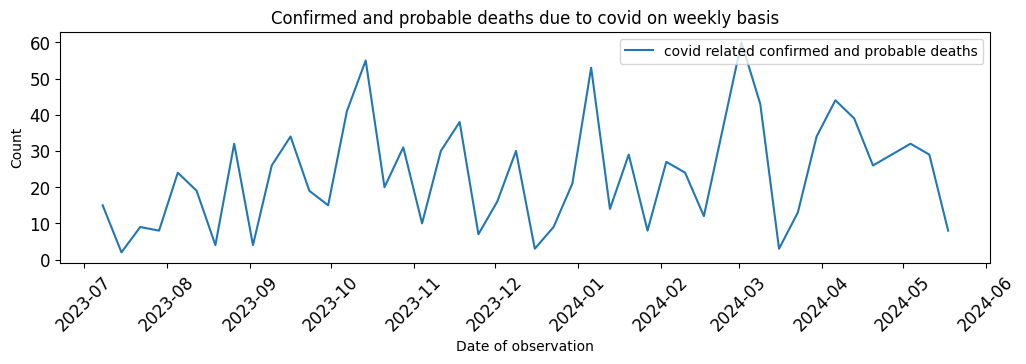

In [58]:
x = covid_report['Week End Date'].dt.date.sort_values()
y1 = covid_report['Confirmed and probable deaths']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='covid related confirmed and probable deaths')

plt.xlabel("Date of observation")
plt.ylabel("Count")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Confirmed and probable deaths due to covid on weekly basis')
plt.show()

In [59]:
print("Min and max confirmed and probable covid cases in week")
covid_report['Confirmed and probable cases'].min(), covid_report['Confirmed and probable cases'].max()

Min and max confirmed and probable covid cases in week


(658, 6893)

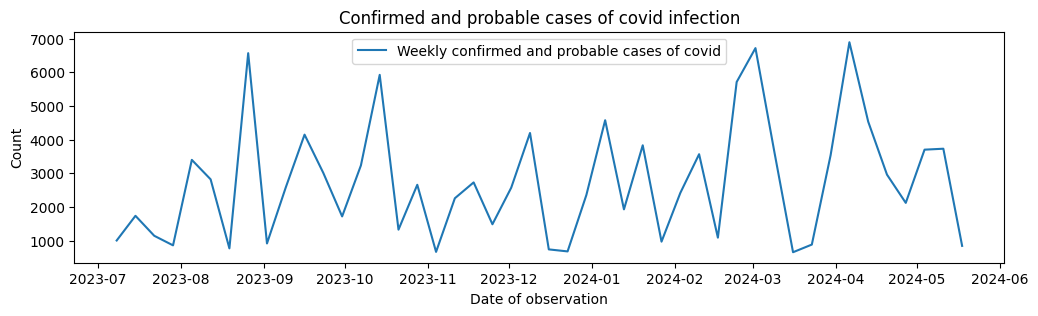

In [60]:
x = covid_report['Week End Date'].dt.date.sort_values()
y1 = covid_report['Confirmed and probable cases']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='Weekly confirmed and probable cases of covid')

plt.xlabel("Date of observation")
plt.ylabel("Count")
plt.legend()
plt.title('Confirmed and probable cases of covid infection')
plt.show()

## Vaccination data analysis

In [61]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Season                                     92 non-null     object        
 1   Start Date                                 92 non-null     datetime64[ns]
 2   End Date                                   92 non-null     datetime64[ns]
 3   Type of vaccine                            92 non-null     object        
 4   Group                                      92 non-null     object        
 5   Subgroup                                   92 non-null     object        
 6   Population                                 92 non-null     float64       
 7   Percent of MA total population vaccinated  92 non-null     float64       
 8   Last updated                               92 non-null     datetime64[ns]
dtypes: datetime64[ns](3), fl

In [62]:
vaccination.describe()

,Start Date,End Date,Population,Percent of MA total population vaccinated,Last updated
count,92,92,9.200000e+01,92.000000,92
mean,2023-07-02 00:00:00,2023-12-12 12:00:00,7.029917e+06,0.197793,2024-05-23 00:00:00
min,2023-07-02 00:00:00,2023-07-08 00:00:00,7.029917e+06,0.000000,2024-05-23 00:00:00
25%,2023-07-02 00:00:00,2023-09-23 00:00:00,7.029917e+06,0.031750,2024-05-23 00:00:00
50%,2023-07-02 00:00:00,2023-12-12 12:00:00,7.029917e+06,0.205000,2024-05-23 00:00:00
75%,2023-07-02 00:00:00,2024-03-02 00:00:00,7.029917e+06,0.358250,2024-05-23 00:00:00
max,2023-07-02 00:00:00,2024-05-18 00:00:00,7.029917e+06,0.417000,2024-05-23 00:00:00
std,NaN,NaN,3.745703e-09,0.151368,NaN


In [63]:
vaccination.describe(include='object')

,Season,Type of vaccine,Group,Subgroup
count,92,92,92,92
unique,1,2,1,1
top,2023-2024,COVID-19,Total,Total vaccinated individuals
freq,92,46,92,92


In [64]:
vaccination.head()

,Season,Start Date,End Date,Type of vaccine,Group,Subgroup,Population,Percent of MA total population vaccinated,Last updated
0,2023-2024,2023-07-02,2023-07-08,COVID-19,Total,Total vaccinated individuals,7.029917e+06,0.0,2024-05-23
1,2023-2024,2023-07-02,2023-07-15,COVID-19,Total,Total vaccinated individuals,7.029917e+06,0.0,2024-05-23
2,2023-2024,2023-07-02,2023-07-22,COVID-19,Total,Total vaccinated individuals,7.029917e+06,0.0,2024-05-23
3,2023-2024,2023-07-02,2023-07-29,COVID-19,Total,Total vaccinated individuals,7.029917e+06,0.0,2024-05-23
4,2023-2024,2023-07-02,2023-08-05,COVID-19,Total,Total vaccinated individuals,7.029917e+06,0.0,2024-05-23


In [65]:
# Begin and end dates
print("Week start date initial:", vaccination['Start Date'].min(), "\nWeek start date last:", vaccination['Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2023-07-02 00:00:00


In [66]:
# Begin and end dates
print("Week end date initial:", vaccination['End Date'].min(), "\nWeek end date last:", vaccination['End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [67]:
vaccination['Type of vaccine'].unique()

array(['COVID-19', 'Influenza'], dtype=object)

In [68]:
print("Min and max percent of vaccinated people in MA for COVID19")
vaccination[vaccination['Type of vaccine']=='COVID-19']['Percent of MA total population vaccinated'].min(), vaccination[vaccination['Type of vaccine']=='COVID-19']['Percent of MA total population vaccinated'].max(),


Min and max percent of vaccinated people in MA for COVID19


(0.0, 0.219)

In [69]:
vaccination[vaccination['Type of vaccine']=='Influenza']['Percent of MA total population vaccinated'].min(),  vaccination[vaccination['Type of vaccine']=='Influenza']['Percent of MA total population vaccinated'].max(),

(0.0, 0.417)

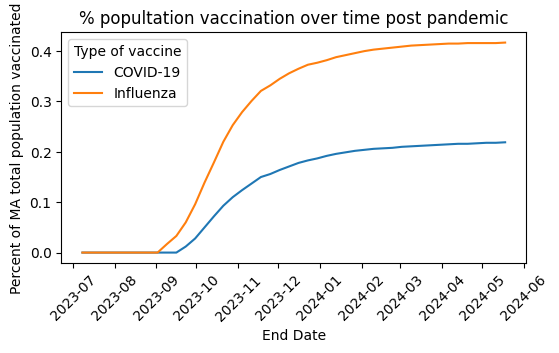

In [70]:
# Vaccination
plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
sns.lineplot(vaccination, x='End Date', y='Percent of MA total population vaccinated', hue='Type of vaccine').set(title='% popultation vaccination over time post pandemic');


## Immunization data analysis

In [71]:
immunization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Type of vaccine                     144 non-null    object        
 1   Season                              144 non-null    object        
 2   Start Date                          144 non-null    datetime64[ns]
 3   End Date                            144 non-null    datetime64[ns]
 4   Group                               144 non-null    object        
 5   Subgroup                            144 non-null    object        
 6   Population                          144 non-null    float64       
 7   Percent of MA residents vaccinated  144 non-null    object        
 8   Last updated                        144 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 10.3+ KB


In [72]:
immunization.describe()

,Start Date,End Date,Population,Last updated
count,144,144,1.440000e+02,144
mean,2023-02-20 13:20:00,2023-08-10 15:20:00,7.029917e+06,2024-03-23 08:00:00
min,2022-07-03 00:00:00,2022-07-09 00:00:00,7.029917e+06,2023-12-07 00:00:00
25%,2022-07-03 00:00:00,2023-03-16 06:00:00,7.029917e+06,2023-12-07 00:00:00
50%,2023-07-02 00:00:00,2023-09-12 12:00:00,7.029917e+06,2024-05-23 00:00:00
75%,2023-07-02 00:00:00,2024-01-14 18:00:00,7.029917e+06,2024-05-23 00:00:00
max,2023-07-02 00:00:00,2024-05-18 00:00:00,7.029917e+06,2024-05-23 00:00:00
std,NaN,NaN,2.056061e-08,NaN


In [73]:
immunization.describe(include='object')

,Type of vaccine,Season,Group,Subgroup,Percent of MA residents vaccinated
count,144,144,144,144,144
unique,2,2,1,1,99
top,Influenza,2023-2024,Total,Total vaccinated individuals,< 1.0%
freq,98,92,144,144,29


In [74]:
immunization.head()

,Type of vaccine,Season,Start Date,End Date,Group,Subgroup,Population,Percent of MA residents vaccinated,Last updated
0,COVID-19,2023-2024,2023-07-02,2023-07-08,Total,Total vaccinated individuals,7.029917e+06,< 1.0%,2024-05-23
1,COVID-19,2023-2024,2023-07-02,2023-07-15,Total,Total vaccinated individuals,7.029917e+06,< 1.0%,2024-05-23
2,COVID-19,2023-2024,2023-07-02,2023-07-22,Total,Total vaccinated individuals,7.029917e+06,< 1.0%,2024-05-23
3,COVID-19,2023-2024,2023-07-02,2023-07-29,Total,Total vaccinated individuals,7.029917e+06,< 1.0%,2024-05-23
4,COVID-19,2023-2024,2023-07-02,2023-08-05,Total,Total vaccinated individuals,7.029917e+06,< 1.0%,2024-05-23


In [75]:
immunization['Type of vaccine'].unique()

array(['COVID-19', 'Influenza'], dtype=object)

In [76]:
immunization['Season'].unique()

array(['2023-2024', '2022-2023'], dtype=object)

### Note
* start and end date columns differet than other datasets

In [77]:
# Begin and end dates
print("Start date initial:", immunization['Start Date'].min(), "\nWeek start date last:", immunization['Start Date'].max())


Start date initial: 2022-07-03 00:00:00 
Week start date last: 2023-07-02 00:00:00


In [78]:
# Begin and end dates
print("End date initial:", immunization['End Date'].min(), "\nEnd date last:", immunization['End Date'].max())

End date initial: 2022-07-09 00:00:00 
End date last: 2024-05-18 00:00:00


### Cleanup of 'Percent of MA residents vaccinated'

In [79]:
# Verification for cleaning 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated'].value_counts()

,count
Percent of MA residents vaccinated,
< 1.0%,29
45.30%,10
41.6%,4
45.20%,3
41.5%,2
...,...
44.70%,1
44.90%,1
44.80%,1


In [80]:
# Verification for cleaning 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated'].unique()

array(['< 1.0%', '1.2%', '2.8%', '5.0%', '7.2%', '9.3%', '11.0%', '12.4%',
       '13.7%', '15.0%', '15.6%', '16.4%', '17.1%', '17.8%', '18.3%',
       '18.7%', '19.2%', '19.6%', '19.9%', '20.2%', '20.4%', '20.6%',
       '20.7%', '20.8%', '21.0%', '21.1%', '21.2%', '21.3%', '21.4%',
       '21.5%', '21.6%', '21.7%', '21.8%', '21.9%', '41.7%', '40.5%',
       '40.0%', '6.0%', '41.1%', '27.9%', '37.7%', '32.1%', '41.2%',
       '40.9%', '22.0%', '25.3%', '30.1%', '41.6%', '40.3%', '37.3%',
       '38.8%', '41.4%', '34.5%', '13.9%', '39.6%', '41.5%', '36.5%',
       '17.9%', '9.6%', '3.3%', '41.3%', '38.2%', '33.2%', '39.2%',
       '40.7%', '1.7%', '35.6%', '1.90%', '4.00%', '6.70%', '10.20%',
       '14.50%', '18.90%', '23.20%', '26.90%', '30.10%', '32.60%',
       '34.90%', '36.10%', '37.50%', '38.80%', '40.10%', '41.00%',
       '41.60%', '42.10%', '42.70%', '43.10%', '43.50%', '43.80%',
       '44.10%', '44.30%', '44.50%', '44.70%', '44.80%', '44.90%',
       '45.00%', '45.10%', '45

In [81]:
# Cleanup and conversion to float of 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated']=immunization['Percent of MA residents vaccinated'].str.strip("%")
# replacing '< 1.0' with 0.5
update_index=immunization[immunization['Percent of MA residents vaccinated']=='< 1.0'].index
update_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  92,  93,  94,  95,  96,  97,  98,  99,
       100],
      dtype='int64')

In [82]:
for i in update_index:
  immunization['Percent of MA residents vaccinated'][i]=0.5
# Verification
immunization[immunization['Percent of MA residents vaccinated']=='< 1.0'].index

Index([], dtype='int64')

In [83]:
immunization['Percent of MA residents vaccinated']=immunization['Percent of MA residents vaccinated'].astype(np.float64)

In [84]:
print('Min and Max percentage of people vaccinated for covid-19')
immunization[immunization['Type of vaccine']=='COVID-19']['Percent of MA residents vaccinated'].min(), immunization[immunization['Type of vaccine']=='COVID-19']['Percent of MA residents vaccinated'].max()

Min and Max percentage of people vaccinated for covid-19


(0.5, 21.9)

In [85]:
print('Min and Max percentage of people vaccinated for Influenza')
immunization[immunization['Type of vaccine']=='Influenza']['Percent of MA residents vaccinated'].min(), immunization[immunization['Type of vaccine']=='Influenza']['Percent of MA residents vaccinated'].max()

Min and Max percentage of people vaccinated for Influenza


(0.5, 45.3)

In [86]:
immunization_data=immunization[(immunization['End Date']<= '2023-07-01') & (immunization['Start Date']< '2023-07-01')]

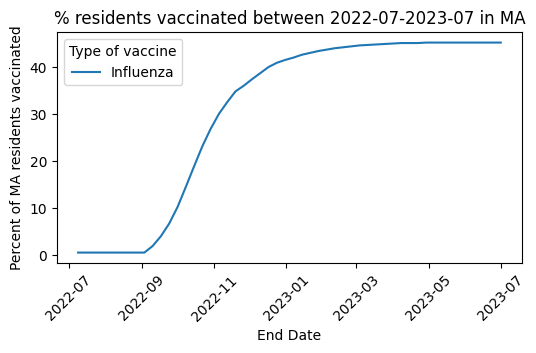

In [87]:
# Vaccination

plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
sns.lineplot(immunization_data, x='End Date', y='Percent of MA residents vaccinated', hue='Type of vaccine').set(title='% residents vaccinated between 2022-07-2023-07 in MA');


## Influenza report analysis

In [88]:
influenza_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Season           322 non-null    object        
 1   Week Start Date  322 non-null    datetime64[ns]
 2   Week End Date    322 non-null    datetime64[ns]
 3   MMWR Week        322 non-null    int64         
 4   Activity type    322 non-null    object        
 5   Region Name      322 non-null    object        
 6   Activity level   322 non-null    object        
 7   Last updated     322 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 20.3+ KB


In [89]:
influenza_report.describe()

,Week Start Date,Week End Date,MMWR Week,Last updated
count,322,322,322.000000,322
mean,2023-12-06 12:00:00,2023-12-12 12:00:00,26.891304,2024-05-23 00:00:00
min,2023-07-02 00:00:00,2023-07-08 00:00:00,1.000000,2024-05-23 00:00:00
25%,2023-09-17 00:00:00,2023-09-23 00:00:00,12.000000,2024-05-23 00:00:00
50%,2023-12-06 12:00:00,2023-12-12 12:00:00,29.500000,2024-05-23 00:00:00
75%,2024-02-25 00:00:00,2024-03-02 00:00:00,41.000000,2024-05-23 00:00:00
max,2024-05-12 00:00:00,2024-05-18 00:00:00,52.000000,2024-05-23 00:00:00
std,NaN,NaN,15.928305,NaN


In [90]:
influenza_report.describe(include='object')

,Season,Activity type,Region Name,Activity level
count,322,322,322,322
unique,1,1,7,5
top,2023-2024,ILI,Boston,Minimal
freq,322,322,46,165


In [91]:
influenza_report.head()

,Season,Week Start Date,Week End Date,MMWR Week,Activity type,Region Name,Activity level,Last updated
0,2023-2024,2023-07-02,2023-07-08,27,ILI,Boston,Minimal,2024-05-23
1,2023-2024,2023-07-02,2023-07-08,27,ILI,Central,Minimal,2024-05-23
2,2023-2024,2023-07-02,2023-07-08,27,ILI,Inner Metro Boston,Minimal,2024-05-23
3,2023-2024,2023-07-02,2023-07-08,27,ILI,Northeast,Minimal,2024-05-23
4,2023-2024,2023-07-02,2023-07-08,27,ILI,Outer Metro Boston,Minimal,2024-05-23


In [92]:
# Begin and end dates
print("Week start date initial:", influenza_report['Week Start Date'].min(), "\nWeek start date last:", influenza_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [93]:
# Begin and end dates
print("Week end date initial:", influenza_report['Week End Date'].min(), "\nWeek end date last:", influenza_report['Week End Date'].max())


Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [94]:
influenza_report['Region Name'].value_counts()

,count
Region Name,
Boston,46
Central,46
Inner Metro Boston,46
Northeast,46
Outer Metro Boston,46
Southeast,46
West,46


In [95]:
influenza_report['Activity level'].value_counts()

,count
Activity level,
Minimal,165
High,83
Low,31
Moderate,27
Very High,16


In [96]:
influenza_report['MMWR Week'].value_counts()

,count
MMWR Week,
27,7
28,7
29,7
30,7
31,7
32,7
33,7
34,7
35,7


In [97]:
# Ordering for plot
influenza_report['level']=influenza_report['Activity level'].replace({'Minimal':0, 'Low': 1, 'Moderate': 2, 'High':3, 'Very High':4})
influenza_report.sort_values(by='level')

,Season,Week Start Date,Week End Date,MMWR Week,Activity type,Region Name,Activity level,Last updated,level
0,2023-2024,2023-07-02,2023-07-08,27,ILI,Boston,Minimal,2024-05-23,0
1,2023-2024,2023-07-02,2023-07-08,27,ILI,Central,Minimal,2024-05-23,0
18,2023-2024,2023-07-16,2023-07-22,29,ILI,Outer Metro Boston,Minimal,2024-05-23,0
19,2023-2024,2023-07-16,2023-07-22,29,ILI,Southeast,Minimal,2024-05-23,0
20,2023-2024,2023-07-16,2023-07-22,29,ILI,West,Minimal,2024-05-23,0
...,...,...,...,...,...,...,...,...,...
194,2023-2024,2024-01-07,2024-01-13,2,ILI,Southeast,Very High,2024-05-23,4
222,2023-2024,2024-02-04,2024-02-10,6,ILI,Southeast,Very High,2024-05-23,4
176,2023-2024,2023-12-24,2023-12-30,52,ILI,Central,Very High,2024-05-23,4
171,2023-2024,2023-12-17,2023-12-23,51,ILI,Northeast,Very High,2024-05-23,4


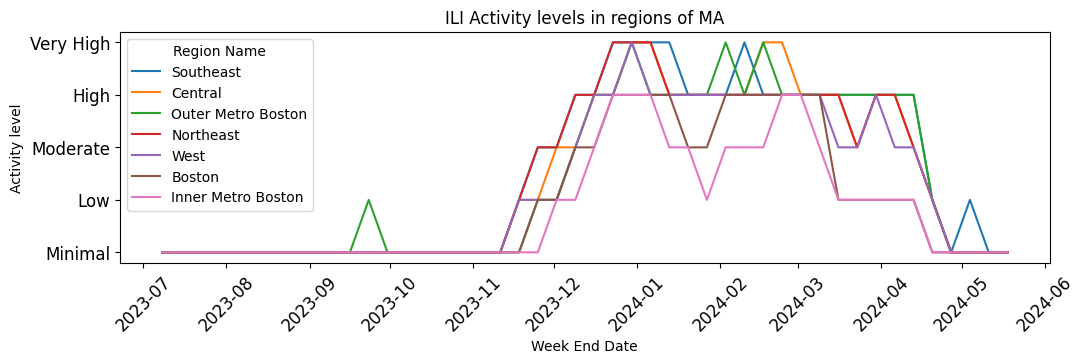

In [98]:
# Vaccination
# Create a count plot of survey responses
# order=['Minimal', 'Low', 'Moderate', 'High', 'Very High']
plt.figure(figsize=(12,3))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.lineplot(influenza_report.sort_values(by='level', ascending=False), x='Week End Date', y='Activity level',  hue='Region Name' ).set(title='ILI Activity levels in regions of MA');


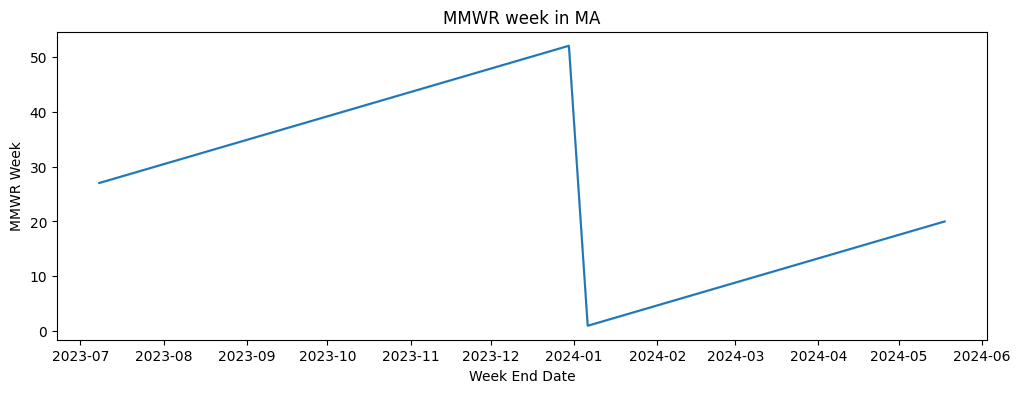

In [99]:
# Vaccination
plt.figure(figsize=(12,4))
sns.lineplot(influenza_report, x='Week End Date', y='MMWR Week').set(title='MMWR week in MA');


## Merging datasets for understanding correlations.

* All merges with season and date

In [100]:
# covid_flu_levels # Split ed visits and admissions. 'Severity level type'
# respiratory_report # split 'Visit type' - Two groups created ED_visits, Hospital_admissions
# wastewater_report # 46 no split.
# covid_report # cases and death data 46
# vaccination # 23-24 yearly data, final status 2024-06
# immunization # 23-24 yearly. final status 2024-05
# influenza_report # mmwr data, 2023-2024-06

In [101]:
covid_flu_levels.columns, covid_flu_levels.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'Severity level type',
        'Percent of all visits for broad acute respiratory syndrome',
        'Severity Level', 'Last updated'],
       dtype='object'),
 (138, 7))

In [102]:
covid_flu_levels['Severity level type'].value_counts()

,count
Severity level type,
COVID-19 ED visits,46
COVID-19 Hospital Admissions,46
Influenza,46


In [103]:
# Splitting to merge only covid data
covid_ed_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']
covid_hospital_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']
# influenza_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='Influenza']

In [104]:
covid_ed_visits.head(2)

,Season,Week Start Date,Week End Date,Severity level type,Percent of all visits for broad acute respiratory syndrome,Severity Level,Last updated
0,2023-2024,2023-07-02,2023-07-08,COVID-19 ED visits,0.082,Minimal,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,COVID-19 ED visits,0.164,Low,2024-05-23


In [105]:
covid_ed_visits=covid_ed_visits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'ED visits percent'})
covid_hospital_visits=covid_hospital_visits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'Hospital admissions percent'})
# influenza_influenza_visitsvisits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'Influenza'})

covid_ed_visits=covid_ed_visits.rename(columns={'Severity Level':'ED visits severity'})
covid_hospital_visits=covid_hospital_visits.rename(columns={'Severity Level':'Hospital admissions severity'})



In [106]:
covid_ed_visits.head(2)

,Season,Week Start Date,Week End Date,Severity level type,ED visits percent,ED visits severity,Last updated
0,2023-2024,2023-07-02,2023-07-08,COVID-19 ED visits,0.082,Minimal,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,COVID-19 ED visits,0.164,Low,2024-05-23


In [107]:
covid_ed_visits=covid_ed_visits.drop('Severity level type',axis=1)

In [108]:
covid_hospital_visits.head(2)

,Season,Week Start Date,Week End Date,Severity level type,Hospital admissions percent,Hospital admissions severity,Last updated
46,2023-2024,2023-07-02,2023-07-08,COVID-19 Hospital Admissions,0.130,Low,2024-05-23
47,2023-2024,2024-02-04,2024-02-10,COVID-19 Hospital Admissions,0.202,Low,2024-05-23


In [109]:
covid_hospital_visits=covid_hospital_visits.drop('Severity level type',axis=1)

In [110]:
# Merging the two
master=pd.merge(covid_ed_visits,covid_hospital_visits, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'], how='outer' )


In [111]:
master.head(2)

,Season,Week Start Date,Week End Date,ED visits percent,ED visits severity,Last updated,Hospital admissions percent,Hospital admissions severity
0,2023-2024,2023-07-02,2023-07-08,0.082,Minimal,2024-05-23,0.130,Low
1,2023-2024,2023-07-09,2023-07-15,0.080,Minimal,2024-05-23,0.131,Low


In [112]:
respiratory_report.columns, respiratory_report.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'Visit type',
        'Percent of all visits for acute respiratory disease',
        'Percent of all visits for COVID-19', 'Percent of all visits for RSV',
        'Percent of all visits for influenza', 'Last updated'],
       dtype='object'),
 (92, 9))

In [113]:
respiratory_report['Visit type'].value_counts()

,count
Visit type,
ED visits,46
Hospital admissions,46


In [114]:
ED_visit_report=respiratory_report[respiratory_report['Visit type']=='ED visits']
Hospital_admissions_report=respiratory_report[respiratory_report['Visit type']=='Hospital admissions']

In [115]:
ED_visit_report.head(2)

,Season,Week Start Date,Week End Date,Visit type,Percent of all visits for acute respiratory disease,Percent of all visits for COVID-19,Percent of all visits for RSV,Percent of all visits for influenza,Last updated
0,2023-2024,2023-07-02,2023-07-08,ED visits,0.082,0.005,0.000,0.001,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,ED visits,0.164,0.019,0.002,0.030,2024-05-23


In [116]:
ED_visit_report=ED_visit_report.rename(columns=({'Percent of all visits for acute respiratory disease': '% ED visits acute respiratory disease','Percent of all visits for COVID-19': '% ED Visits covid',
                                                 'Percent of all visits for RSV': '% ED visits rsv', 'Percent of all visits for influenza': '% ED visits influenza'}))

In [117]:
ED_visit_report.head(2)

,Season,Week Start Date,Week End Date,Visit type,% ED visits acute respiratory disease,% ED Visits covid,% ED visits rsv,% ED visits influenza,Last updated
0,2023-2024,2023-07-02,2023-07-08,ED visits,0.082,0.005,0.000,0.001,2024-05-23
1,2023-2024,2024-02-04,2024-02-10,ED visits,0.164,0.019,0.002,0.030,2024-05-23


In [118]:
ED_visit_report=ED_visit_report.drop('Visit type', axis=1)

In [119]:
Hospital_admissions_report=Hospital_admissions_report.rename(columns=({'Percent of all visits for acute respiratory disease': '% Admission acute respiratory disease','Percent of all visits for COVID-19': '% Admissions covid',
                                                 'Percent of all visits for RSV': '% Admissions rsv', 'Percent of all visits for influenza': '% Admissions influenza'}))

In [120]:
Hospital_admissions_report.head(2)

,Season,Week Start Date,Week End Date,Visit type,% Admission acute respiratory disease,% Admissions covid,% Admissions rsv,% Admissions influenza,Last updated
46,2023-2024,2023-07-02,2023-07-08,Hospital admissions,0.130,0.008,0.000,0.001,2024-05-23
47,2023-2024,2024-02-04,2024-02-10,Hospital admissions,0.202,0.029,0.004,0.025,2024-05-23


In [121]:
Hospital_admissions_report=Hospital_admissions_report.drop('Visit type', axis=1)

In [122]:
# Merging the master

master_1=master.merge(Hospital_admissions_report, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'])

In [123]:
master_2=master_1.merge(ED_visit_report, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'])

In [124]:
wastewater_report.columns, wastewater_report.shape

(Index(['Week Start Date', 'Week End Date',
        'Number of samples where SARS-CoV-2 was detected', 'Last updated',
        'Statewide average effective SARS-CoV-2 concentration'],
       dtype='object'),
 (47, 5))

In [125]:
master_3=master_2.merge(wastewater_report, on=['Week Start Date', 'Week End Date', 'Last updated'])

In [126]:
covid_report.columns, covid_report.shape

(Index(['Week Start Date', 'Week End Date', 'Confirmed and probable deaths',
        'Confirmed and probable cases', 'Last updated'],
       dtype='object'),
 (46, 5))

In [127]:
master_4= master_3.merge(covid_report, on=['Week Start Date', 'Week End Date', 'Last updated'])

In [128]:
vaccination.columns, vaccination.shape

(Index(['Season', 'Start Date', 'End Date', 'Type of vaccine', 'Group',
        'Subgroup', 'Population', 'Percent of MA total population vaccinated',
        'Last updated'],
       dtype='object'),
 (92, 9))

In [129]:
influenza_report.columns, influenza_report.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'MMWR Week',
        'Activity type', 'Region Name', 'Activity level', 'Last updated',
        'level'],
       dtype='object'),
 (322, 9))

In [130]:
influenza_report['Region Name'].value_counts()

,count
Region Name,
Boston,46
Central,46
Inner Metro Boston,46
Northeast,46
Outer Metro Boston,46
Southeast,46
West,46


In [131]:
master_4.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'ED visits percent',
       'ED visits severity', 'Last updated', 'Hospital admissions percent',
       'Hospital admissions severity', '% Admission acute respiratory disease',
       '% Admissions covid', '% Admissions rsv', '% Admissions influenza',
       '% ED visits acute respiratory disease', '% ED Visits covid',
       '% ED visits rsv', '% ED visits influenza',
       'Number of samples where SARS-CoV-2 was detected',
       'Statewide average effective SARS-CoV-2 concentration',
       'Confirmed and probable deaths', 'Confirmed and probable cases'],
      dtype='object')

In [132]:
master_4.head()

,Season,Week Start Date,Week End Date,ED visits percent,ED visits severity,Last updated,Hospital admissions percent,Hospital admissions severity,% Admission acute respiratory disease,% Admissions covid,% Admissions rsv,% Admissions influenza,% ED visits acute respiratory disease,% ED Visits covid,% ED visits rsv,% ED visits influenza,Number of samples where SARS-CoV-2 was detected,Statewide average effective SARS-CoV-2 concentration,Confirmed and probable deaths,Confirmed and probable cases
0,2023-2024,2023-07-02,2023-07-08,0.082,Minimal,2024-05-23,0.130,Low,0.130,0.008,0.0,0.001,0.082,0.005,0.0,0.001,75,212659.407869,8,846
1,2023-2024,2023-07-09,2023-07-15,0.080,Minimal,2024-05-23,0.131,Low,0.131,0.010,0.0,0.000,0.080,0.006,0.0,0.000,97,410604.937610,8,972
2,2023-2024,2023-07-16,2023-07-22,0.080,Minimal,2024-05-23,0.134,Low,0.134,0.012,0.0,0.001,0.080,0.007,0.0,0.000,94,261716.734110,9,1146
3,2023-2024,2023-07-23,2023-07-29,0.080,Minimal,2024-05-23,0.129,Low,0.129,0.013,0.0,0.000,0.080,0.009,0.0,0.000,87,406865.101885,7,1488
4,2023-2024,2023-07-30,2023-08-05,0.083,Minimal,2024-05-23,0.131,Low,0.131,0.015,0.0,0.001,0.083,0.010,0.0,0.001,90,439943.142381,2,1739


In [133]:
master_4=master_4.drop(columns=['Season', 'Week Start Date', 'Week End Date', '% Admission acute respiratory disease', 'Last updated', '% ED visits acute respiratory disease'])


In [134]:
master_4=master_4.drop(columns=['% Admissions rsv', '% Admissions influenza', '% ED visits rsv' , '% ED visits influenza'])

In [135]:
master_4=master_4.drop(columns=['Hospital admissions percent', 'ED visits percent'])

In [136]:
master_4.head()

,ED visits severity,Hospital admissions severity,% Admissions covid,% ED Visits covid,Number of samples where SARS-CoV-2 was detected,Statewide average effective SARS-CoV-2 concentration,Confirmed and probable deaths,Confirmed and probable cases
0,Minimal,Low,0.008,0.005,75,212659.407869,8,846
1,Minimal,Low,0.010,0.006,97,410604.937610,8,972
2,Minimal,Low,0.012,0.007,94,261716.734110,9,1146
3,Minimal,Low,0.013,0.009,87,406865.101885,7,1488
4,Minimal,Low,0.015,0.010,90,439943.142381,2,1739


## Feature engineering

In [137]:
master_4['ED visits severity'].unique()

array(['Minimal', 'Low', 'Moderate', 'Substantial'], dtype=object)

In [138]:
master_4['Hospital admissions severity']=master_4['Hospital admissions severity'].replace({'Low':0, 'Medium':1})
master_4['ED visits severity']=master_4['ED visits severity'].replace({'Minimal':0, 'Low':1, 'Moderate':2, 'Medium':3, 'High':4, 'Substantial':5})



In [139]:
master_4.head()

,ED visits severity,Hospital admissions severity,% Admissions covid,% ED Visits covid,Number of samples where SARS-CoV-2 was detected,Statewide average effective SARS-CoV-2 concentration,Confirmed and probable deaths,Confirmed and probable cases
0,0,0,0.008,0.005,75,212659.407869,8,846
1,0,0,0.010,0.006,97,410604.937610,8,972
2,0,0,0.012,0.007,94,261716.734110,9,1146
3,0,0,0.013,0.009,87,406865.101885,7,1488
4,0,0,0.015,0.010,90,439943.142381,2,1739


In [140]:
# Function for scaling
def normalize(x):
    return [(i - min(x)) / (max(x) - min(x)) for i in x]


In [141]:
# Min max scaling for all numerics
master_4['ED visits severity']= normalize(master_4['ED visits severity'])
master_4['Hospital admissions severity']= normalize(master_4['Hospital admissions severity'])
master_4['Number of samples where SARS-CoV-2 was detected']= normalize(master_4['Number of samples where SARS-CoV-2 was detected'])
master_4['Statewide average effective SARS-CoV-2 concentration']= normalize(master_4['Statewide average effective SARS-CoV-2 concentration'])
master_4['Confirmed and probable deaths']= normalize(master_4['Confirmed and probable deaths'])
master_4['Confirmed and probable cases']= normalize(master_4['Confirmed and probable cases'])


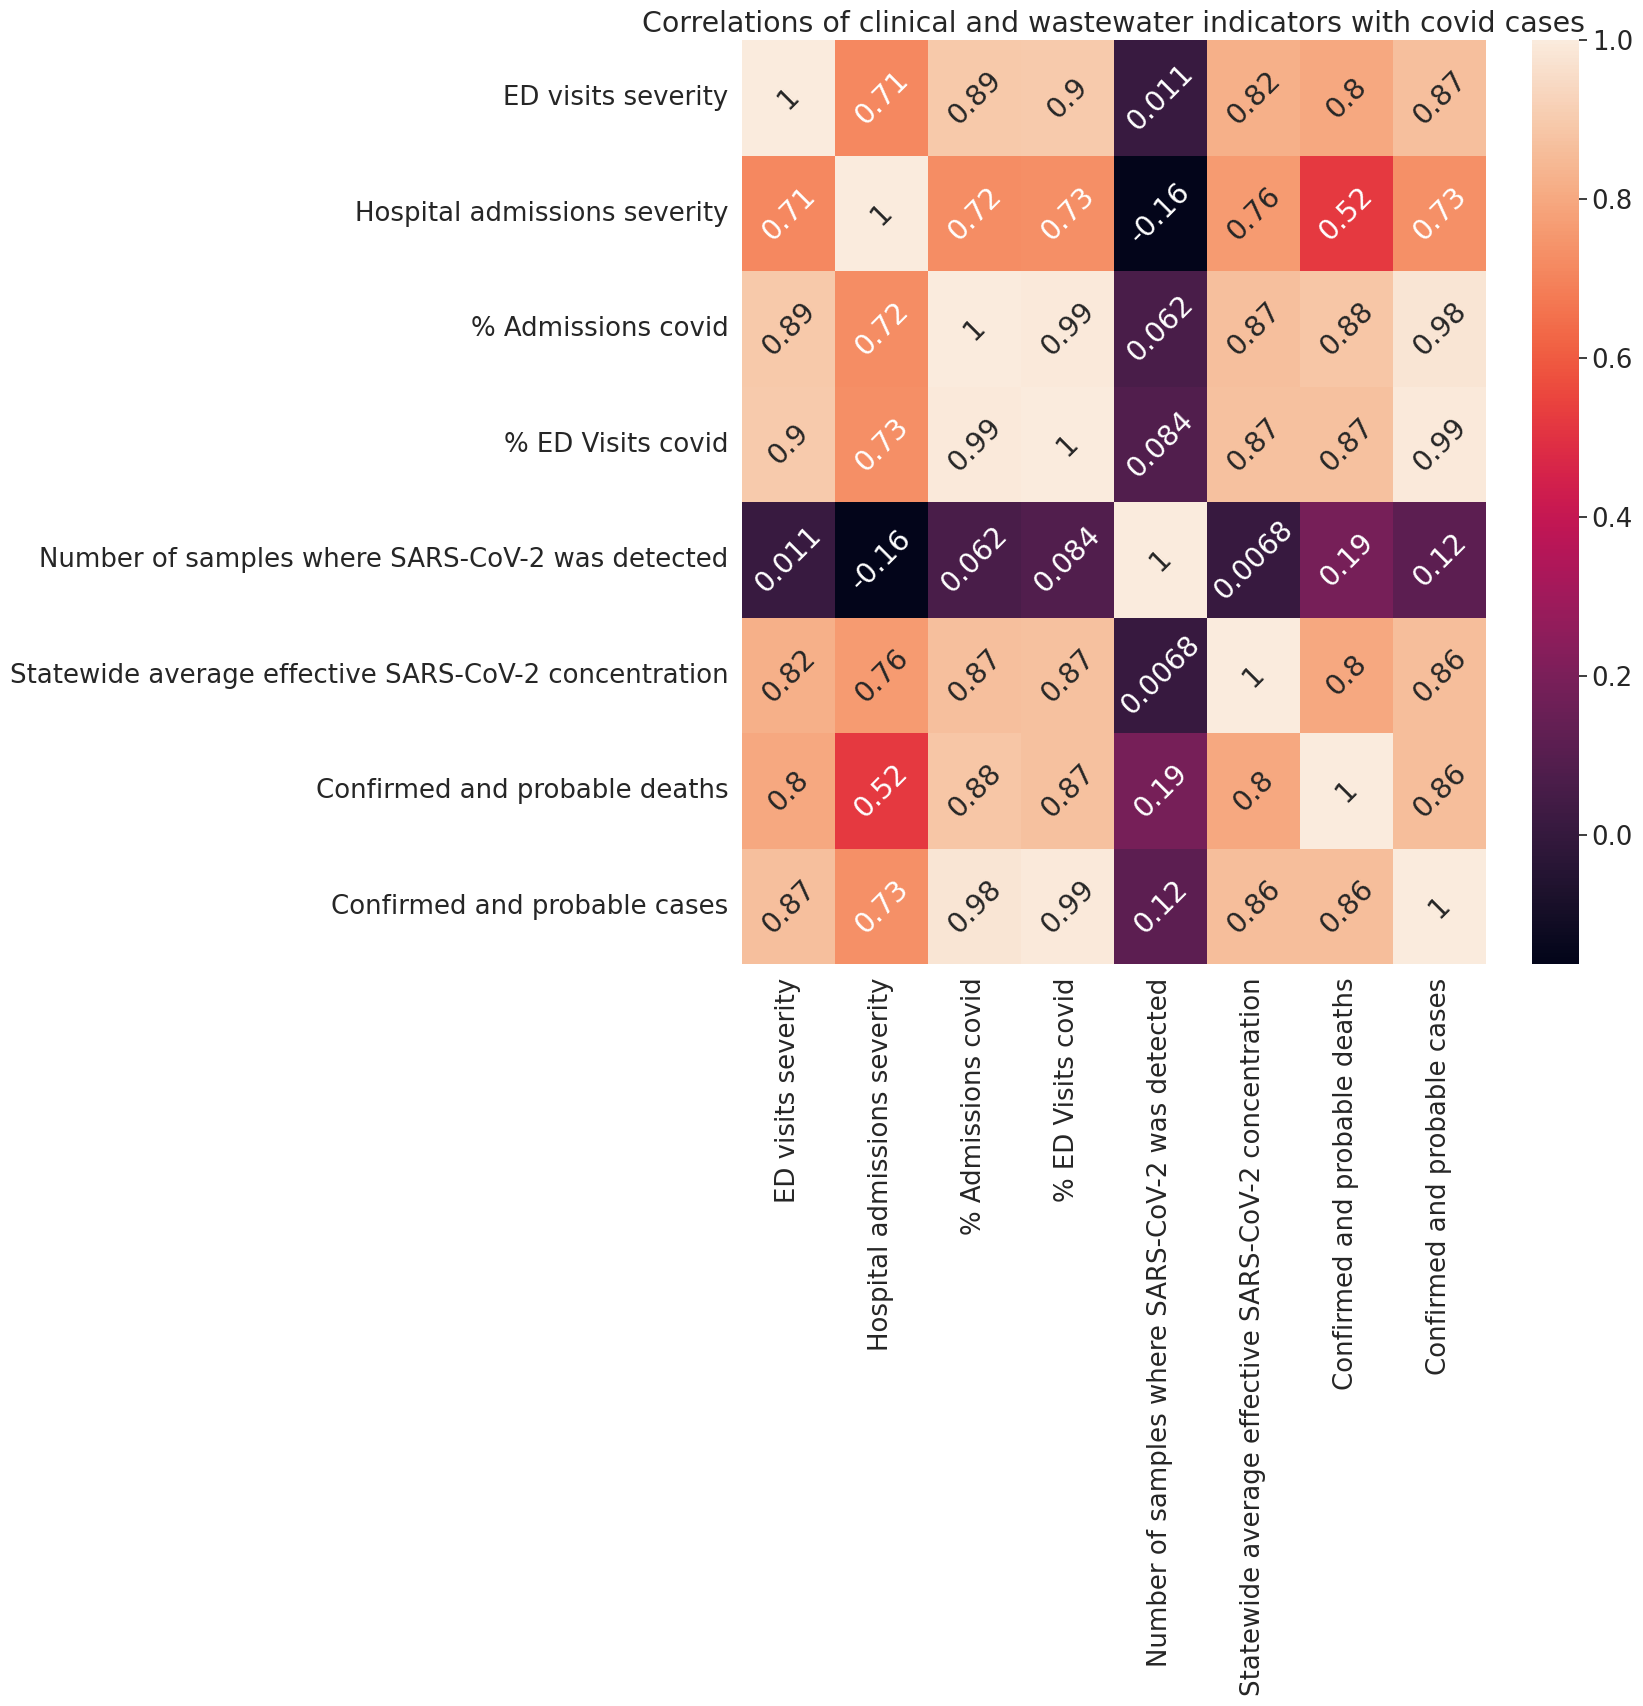

In [142]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.7)
sns.heatmap(master_4.corr(), annot=True, annot_kws={ "rotation": 45}).set(title='Correlations of clinical and wastewater indicators with covid cases');

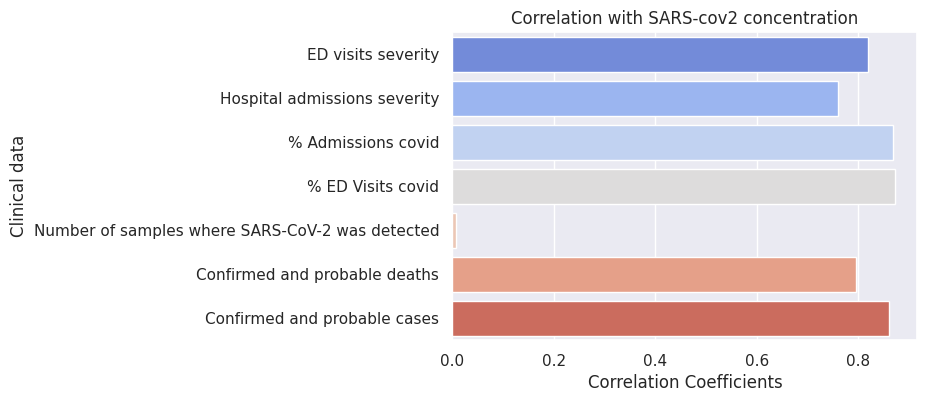

In [143]:
wastewater_correlation = master_4.corr()['Statewide average effective SARS-CoV-2 concentration'].drop(['Statewide average effective SARS-CoV-2 concentration'])
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
plt.title('Correlation with SARS-cov2 concentration')
plt.xlabel('Correlation Coefficients')
plt.ylabel('Clinical data')
sns.barplot(x=wastewater_correlation.values, y=wastewater_correlation.index, palette='coolwarm')
plt.show();

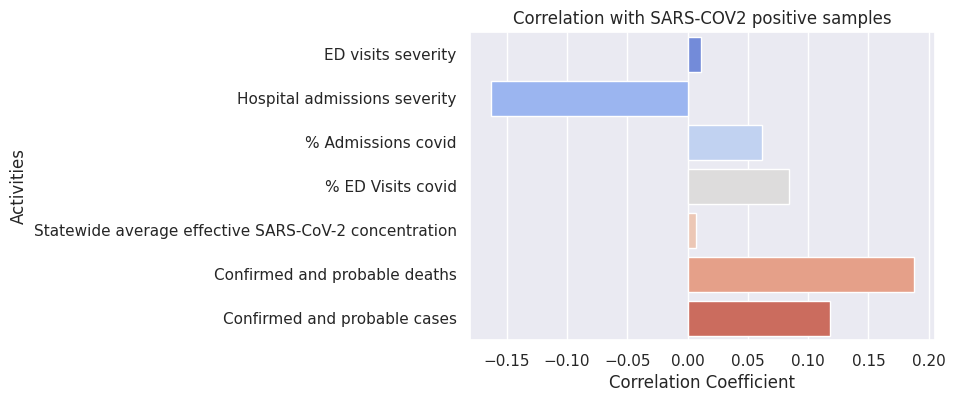

In [144]:
SampleNum_correlation = master_4.corr()['Number of samples where SARS-CoV-2 was detected'].drop(['Number of samples where SARS-CoV-2 was detected'])
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
plt.title('Correlation with SARS-COV2 positive samples')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Activities')
sns.barplot(x=SampleNum_correlation.values, y=SampleNum_correlation.index, palette='coolwarm')
plt.show();

## Respiratory historical data

In [145]:
# Importing current and historic sheets

df=pd.read_excel("/content/respiratory-disease-data-reporting-05-23-24.xlsx", 'Historic demographic data') # Imported earlier

df1 = pd.read_excel('/content/respiratory-disease-data-reporting-05-23-24.xlsx', sheet_name="Visits by week")

df2 = pd.read_excel('/content/respiratory-disease-data-reporting-05-23-24.xlsx', sheet_name="Previous Seasons by Week")


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Season                                                222 non-null    object        
 1   Start Date                                            222 non-null    datetime64[ns]
 2   End Date                                              222 non-null    datetime64[ns]
 3   Visit type                                            222 non-null    object        
 4   Group                                                 222 non-null    object        
 5   Subgroup                                              222 non-null    object        
 6   Rate of broad acute respiratory visits (per 100,000)  222 non-null    object        
 7   Population                                            172 non-null    float64   

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Season                                                92 non-null     object        
 1   Week Start Date                                       92 non-null     datetime64[ns]
 2   Week End Date                                         92 non-null     datetime64[ns]
 3   Visit type                                            92 non-null     object        
 4   COVID Severity Level                                  92 non-null     object        
 5   Total visits                                          92 non-null     int64         
 6   Percent of visits for acute respiratory diseases      92 non-null     float64       
 7   Percent of all visits for COVID-19                    92 non-null     float64     

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            418 non-null    object        
 1   Visit type                                        418 non-null    object        
 2   Week Start Date                                   418 non-null    datetime64[ns]
 3   Week End Date                                     418 non-null    datetime64[ns]
 4   Total visits                                      418 non-null    int64         
 5   Percent of visits for acute respiratory diseases  418 non-null    float64       
 6   Percent of visits for COVID-19                    418 non-null    float64       
 7   Percent of visits for influenza                   418 non-null    float64       
 8   Percent of visits for RSV     

In [149]:
df1.Season.unique()

array(['2023-2024'], dtype=object)

In [150]:
df1['Visit type'].value_counts()

,count
Visit type,
ED visits,46
Admissions,46


In [151]:
df2.Season.unique()

array(['2022-2023', '2020-2021', '2021-2022', '2019-2020'], dtype=object)

In [152]:
df2['Visit type'].value_counts()

,count
Visit type,
ED Visit,209
Admission,209


In [153]:
for i in df2.Season.unique():
  for j in df2['Visit type'].unique():
     print("Data for season and visit type:", i, j )
     print(df2[(df2.Season== i) & (df2['Visit type']==j)].info())

Data for season and visit type: 2022-2023 ED Visit
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            52 non-null     object        
 1   Visit type                                        52 non-null     object        
 2   Week Start Date                                   52 non-null     datetime64[ns]
 3   Week End Date                                     52 non-null     datetime64[ns]
 4   Total visits                                      52 non-null     int64         
 5   Percent of visits for acute respiratory diseases  52 non-null     float64       
 6   Percent of visits for COVID-19                    52 non-null     float64       
 7   Percent of visits for influenza                   52 non-null     float

## Concatenation of two sets df1 and df2 - Covid_series for all the seasons for time_series analysis

In [154]:
df1.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'Visit type',
       'COVID Severity Level', 'Total visits',
       'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for RSV',
       'Percent of all visits for influenza',
       'Estimated number of acute respiratory disease visits', 'Last updated'],
      dtype='object')

In [155]:
df2.columns

Index(['Season', 'Visit type', 'Week Start Date', 'Week End Date',
       'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of visits for COVID-19', 'Percent of visits for influenza',
       'Percent of visits for RSV', 'Last updated'],
      dtype='object')

In [156]:
# Renaming columns in df2 to make them same
df2=df2.rename(columns=({'Percent of visits for COVID-19':'Percent of all visits for COVID-19', 'Percent of visits for influenza':'Percent of all visits for influenza', 'Percent of visits for RSV':'Percent of all visits for RSV' }))

In [157]:
# Extracting only common columns to concat
Covid_series=pd.concat([df1[['Season', 'Visit type', 'Week Start Date', 'Week End Date',
      'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for influenza',
       'Percent of all visits for RSV', 'Last updated']],
                        df2[['Season', 'Visit type', 'Week Start Date', 'Week End Date',
      'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for influenza',
       'Percent of all visits for RSV', 'Last updated']]])

In [158]:
Covid_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            510 non-null    object        
 1   Visit type                                        510 non-null    object        
 2   Week Start Date                                   510 non-null    datetime64[ns]
 3   Week End Date                                     510 non-null    datetime64[ns]
 4   Total visits                                      510 non-null    int64         
 5   Percent of visits for acute respiratory diseases  510 non-null    float64       
 6   Percent of all visits for COVID-19                510 non-null    float64       
 7   Percent of all visits for influenza               510 non-null    float64       
 8   Percent of all visits for RSV      

In [159]:
Covid_series.Season.unique()

array(['2023-2024', '2022-2023', '2020-2021', '2021-2022', '2019-2020'],
      dtype=object)

In [160]:
Covid_series['Visit type'].unique()

array(['ED visits', 'Admissions', 'ED Visit', 'Admission'], dtype=object)

In [161]:
# Converting the visits type to same
Covid_series['Visit type']=Covid_series['Visit type'].replace({'ED visits':'ED visits', 'ED Visit':'ED visits', 'Admissions':'Admissions', 'Admission': 'Admissions'})

In [162]:
# Verifying
Covid_series['Visit type'].unique()

array(['ED visits', 'Admissions'], dtype=object)

In [163]:

Covid_series['Percent of all visits for COVID-19'].describe()

,Percent of all visits for COVID-19
count,510.000000
mean,0.030372
std,0.035205
min,0.000000
25%,0.006918
50%,0.022000
75%,0.040325
max,0.239301


In [164]:
Covid_series['Total visits'].describe()

,Total visits
count,510.000000
mean,36912.303922
std,24336.992395
min,8891.000000
25%,13479.250000
50%,24629.500000
75%,63635.750000
max,71616.000000


In [165]:
Covid_series['covid_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for COVID-19']/100))
Covid_series['rsv_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for RSV']/100))
Covid_series['influenza_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for influenza']/100))

In [166]:
Covid_series['covid_numbers'].describe()

,covid_numbers
count,510.000000
mean,8.964706
std,11.661345
min,0.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,116.000000


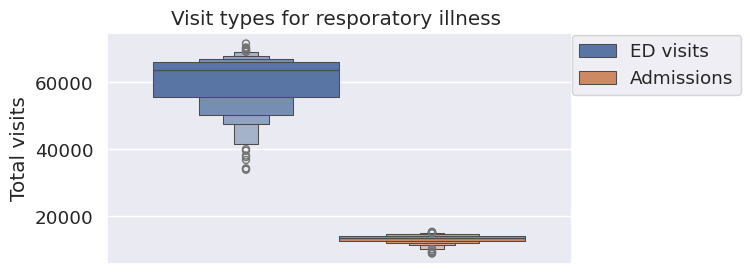

In [167]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='Total visits', hue='Visit type').set(title='Visit types for resporatory illness ');
# Put the legend out of the figure
plt.legend( bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);


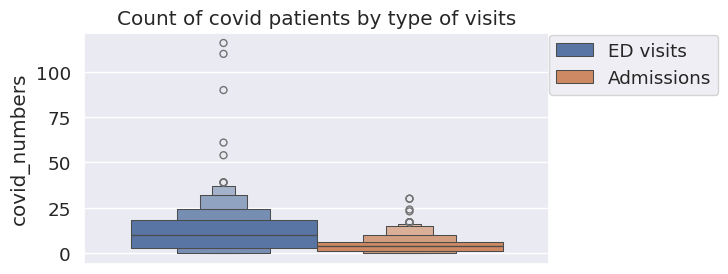

In [168]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='covid_numbers', hue='Visit type').set(title='Count of covid patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

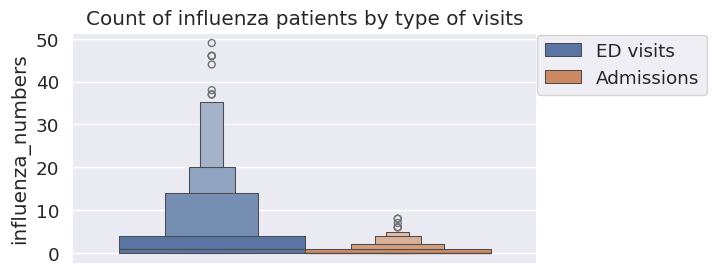

In [169]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='influenza_numbers', hue='Visit type').set(title='Count of influenza patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

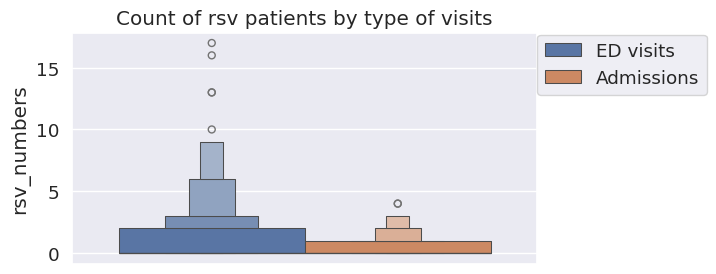

In [170]:
plt.figure(figsize=(6,3))
sns.boxenplot(Covid_series, y='rsv_numbers', hue='Visit type').set(title='Count of rsv patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

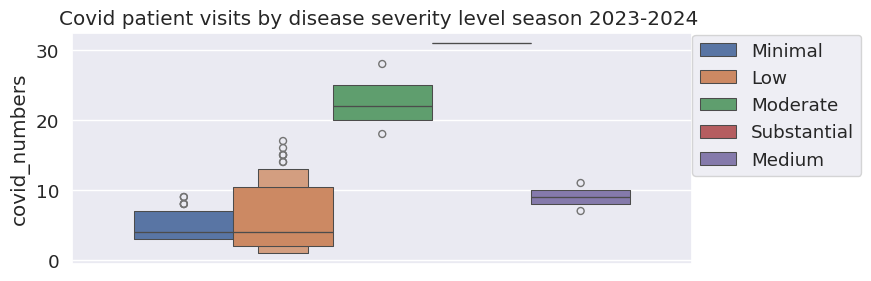

In [171]:
# Severity levels current data only from df1 for covid19 patients
df1['covid_numbers']=round(df1['Total visits']* (df1['Percent of all visits for COVID-19']/100))
plt.figure(figsize=(8,3))
sns.boxenplot(df1, y='covid_numbers', hue='COVID Severity Level').set(title='Covid patient visits by disease severity level season 2023-2024 ')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

In [172]:
Covid_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            510 non-null    object        
 1   Visit type                                        510 non-null    object        
 2   Week Start Date                                   510 non-null    datetime64[ns]
 3   Week End Date                                     510 non-null    datetime64[ns]
 4   Total visits                                      510 non-null    int64         
 5   Percent of visits for acute respiratory diseases  510 non-null    float64       
 6   Percent of all visits for COVID-19                510 non-null    float64       
 7   Percent of all visits for influenza               510 non-null    float64       
 8   Percent of all visits for RSV      

In [173]:
# Taking a copy for future analysis, without redoing all preprocessing
Covid_series.to_csv('/content/Covid_series.csv')

## The Covid servies is cleand and preprocessed data for time series analysis